# Projet Python

# Récupération des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
x_test = pd.read_csv('D:/ESILV/5A/Python/Test/X_test.txt',sep=' ', header=None) #données acc et gyro
y_test = pd.read_csv('D:/ESILV/5A/Python/Test/y_test.txt',sep=' ',header=None)#.to_numpy() #activités effectuées 
subject_id_test=pd.read_csv('D:/ESILV/5A/Python/Test/subject_id_test.txt',sep=' ',header=None).to_numpy() #sujet faisant l'action


In [3]:
x_train = pd.read_csv('D:/ESILV/5A/Python/Train/X_train.txt',sep=' ',header=None)
y_train = pd.read_csv('D:/ESILV/5A/Python/Train/y_train.txt',sep=' ',header=None)#.to_numpy()
subject_id_train=pd.read_csv('D:/ESILV/5A/Python/Train/subject_id_train.txt',sep=' ',header=None).to_numpy()


In [9]:
features = pd.read_csv('D:/ESILV/5A/Python/features.txt',delim_whitespace=True,header=None)
features.columns=['features']

activites_effectuees = {
    
    'Activity': {
                  1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LIYING', #les activités
                  7: 'STAND_TO_SIT',  8: 'SIT_TO_STAND',  9: 'SIT_TO_LIE', 10: 'LIE_TO_SIT',  11: 'STAND_TO_LIE', 12: 'LIE_TO_STAND',# les transitions
            }
}

In [10]:
x_test.columns=features #Récupération des noms de colonnes
x_train.columns=features
features
x_test.head()

,"(tBodyAcc-Mean-1,)","(tBodyAcc-Mean-2,)","(tBodyAcc-Mean-3,)","(tBodyAcc-STD-1,)","(tBodyAcc-STD-2,)","(tBodyAcc-STD-3,)","(tBodyAcc-Mad-1,)","(tBodyAcc-Mad-2,)","(tBodyAcc-Mad-3,)","(tBodyAcc-Max-1,)",...,"(fBodyGyroJerkMag-MeanFreq-1,)","(fBodyGyroJerkMag-Skewness-1,)","(fBodyGyroJerkMag-Kurtosis-1,)","(tBodyAcc-AngleWRTGravity-1,)","(tBodyAccJerk-AngleWRTGravity-1,)","(tBodyGyro-AngleWRTGravity-1,)","(tBodyGyroJerk-AngleWRTGravity-1,)","(tXAxisAcc-AngleWRTGravity-1,)","(tYAxisAcc-AngleWRTGravity-1,)","(tZAxisAcc-AngleWRTGravity-1,)"
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [11]:
x_train['ID_sujet']=subject_id_train
x_test['ID_sujet']=subject_id_test
x_train.head()

,"(tBodyAcc-Mean-1,)","(tBodyAcc-Mean-2,)","(tBodyAcc-Mean-3,)","(tBodyAcc-STD-1,)","(tBodyAcc-STD-2,)","(tBodyAcc-STD-3,)","(tBodyAcc-Mad-1,)","(tBodyAcc-Mad-2,)","(tBodyAcc-Mad-3,)","(tBodyAcc-Max-1,)",...,"(fBodyGyroJerkMag-Skewness-1,)","(fBodyGyroJerkMag-Kurtosis-1,)","(tBodyAcc-AngleWRTGravity-1,)","(tBodyAccJerk-AngleWRTGravity-1,)","(tBodyGyro-AngleWRTGravity-1,)","(tBodyGyroJerk-AngleWRTGravity-1,)","(tXAxisAcc-AngleWRTGravity-1,)","(tYAxisAcc-AngleWRTGravity-1,)","(tZAxisAcc-AngleWRTGravity-1,)",ID_sujet
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1


In [12]:
y_train.columns=['Activity']
x_train_copie=x_train
x_train_copie['Activity']=y_train
y_train.replace(activites_effectuees,inplace=True)
y_test.columns=['Activity']
y_test.replace(activites_effectuees,inplace=True)
y_test

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING
5,STANDING
6,STANDING
7,STANDING
8,STANDING
9,STANDING


In [13]:
print('Valeurs dupliquées dans x_train: {}'.format(sum(x_train.duplicated())))
print('Valeurs nulles dans x_train: {}'.format(x_train.isnull().values.sum()))
print('Valeurs nulles dans x_test: {}'.format(x_test.isnull().values.sum()))
print('Valeurs dupliquées dans x_test: {}'.format(sum(x_test.duplicated())))

Valeurs dupliquées dans x_train: 0
Valeurs nulles dans x_train: 0
Valeurs nulles dans x_test: 0
Valeurs dupliquées dans x_test: 0


In [14]:
corrMatrice=x_train.corr()
corrMatrice

,"(tBodyAcc-Mean-1,)","(tBodyAcc-Mean-2,)","(tBodyAcc-Mean-3,)","(tBodyAcc-STD-1,)","(tBodyAcc-STD-2,)","(tBodyAcc-STD-3,)","(tBodyAcc-Mad-1,)","(tBodyAcc-Mad-2,)","(tBodyAcc-Mad-3,)","(tBodyAcc-Max-1,)",...,"(fBodyGyroJerkMag-Kurtosis-1,)","(tBodyAcc-AngleWRTGravity-1,)","(tBodyAccJerk-AngleWRTGravity-1,)","(tBodyGyro-AngleWRTGravity-1,)","(tBodyGyroJerk-AngleWRTGravity-1,)","(tXAxisAcc-AngleWRTGravity-1,)","(tYAxisAcc-AngleWRTGravity-1,)","(tZAxisAcc-AngleWRTGravity-1,)",ID_sujet,Activity
"(tBodyAcc-Mean-1,)",1.000000,-0.635967,-0.630025,0.023420,-0.020698,-0.045023,0.030579,-0.024288,-0.049180,0.147468,...,-0.017768,-0.132641,0.026053,-0.053429,0.030064,0.124145,-0.098704,-0.079874,-0.000838,0.066650
"(tBodyAcc-Mean-2,)",-0.635967,1.000000,0.472460,-0.022666,0.043462,0.065096,-0.024190,0.052732,0.075577,-0.112580,...,0.010830,0.047590,0.021639,0.072296,0.029428,-0.088592,0.080304,0.043551,-0.003036,0.074336
"(tBodyAcc-Mean-3,)",-0.630025,0.472460,1.000000,-0.013337,0.046654,0.069783,-0.014879,0.055531,0.080151,-0.099253,...,0.022980,0.027744,0.001779,0.016080,-0.018802,-0.079965,0.042147,0.073170,-0.002953,0.054117
"(tBodyAcc-STD-1,)",0.023420,-0.022666,-0.013337,1.000000,0.879795,0.804476,0.998320,0.858936,0.784682,0.968917,...,0.105513,-0.022767,-0.007824,0.014518,-0.022963,-0.339444,0.422214,0.363769,-0.064116,-0.505562
"(tBodyAcc-STD-2,)",-0.020698,0.043462,0.046654,0.879795,1.000000,0.873746,0.875431,0.996065,0.867446,0.848091,...,0.164964,0.020252,0.030832,-0.002586,-0.005665,-0.328960,0.423689,0.369203,-0.115576,-0.398140
"(tBodyAcc-STD-3,)",-0.045023,0.065096,0.069783,0.804476,0.873746,1.000000,0.798354,0.866089,0.995997,0.780175,...,0.116765,0.031074,0.025896,-0.012959,0.000035,-0.298680,0.385133,0.414432,-0.046601,-0.363235
"(tBodyAcc-Mad-1,)",0.030579,-0.024190,-0.014879,0.998320,0.875431,0.798354,1.000000,0.854812,0.779153,0.960180,...,0.106670,-0.029141,-0.006021,0.014408,-0.022722,-0.332691,0.413780,0.357139,-0.062688,-0.495875
"(tBodyAcc-Mad-2,)",-0.024288,0.052732,0.055531,0.858936,0.996065,0.866089,0.854812,1.000000,0.862286,0.824770,...,0.159287,0.022011,0.035898,-0.004658,-0.001583,-0.317816,0.411093,0.357991,-0.114454,-0.365423
"(tBodyAcc-Mad-3,)",-0.049180,0.075577,0.080151,0.784682,0.867446,0.995997,0.779153,0.862286,1.000000,0.757081,...,0.114199,0.034248,0.031382,-0.016988,0.000626,-0.291831,0.372595,0.398343,-0.049274,-0.330773
"(tBodyAcc-Max-1,)",0.147468,-0.112580,-0.099253,0.968917,0.848091,0.780175,0.960180,0.824770,0.757081,1.000000,...,0.108027,-0.026451,-0.017281,0.013410,-0.025747,-0.344166,0.431880,0.370933,-0.056991,-0.536458


In [ ]:
snb.heatmap(corrMatrice, annot=True)

KeyboardInterrupt: 

In [10]:
print(x_train.columns)
print(y_train.columns)

Index([                ('tBodyAcc-Mean-1',),
                       ('tBodyAcc-Mean-2',),
                       ('tBodyAcc-Mean-3',),
                        ('tBodyAcc-STD-1',),
                        ('tBodyAcc-STD-2',),
                        ('tBodyAcc-STD-3',),
                        ('tBodyAcc-Mad-1',),
                        ('tBodyAcc-Mad-2',),
                        ('tBodyAcc-Mad-3',),
                        ('tBodyAcc-Max-1',),
       ...
           ('fBodyGyroJerkMag-Kurtosis-1',),
            ('tBodyAcc-AngleWRTGravity-1',),
        ('tBodyAccJerk-AngleWRTGravity-1',),
           ('tBodyGyro-AngleWRTGravity-1',),
       ('tBodyGyroJerk-AngleWRTGravity-1',),
           ('tXAxisAcc-AngleWRTGravity-1',),
           ('tYAxisAcc-AngleWRTGravity-1',),
           ('tZAxisAcc-AngleWRTGravity-1',),
                                 'ID_sujet',
                                 'Activity'],
      dtype='object', length=563)
Index(['Activity'], dtype='object')


In [ ]:
plt.figure(figsize=(10,7))
snb.boxplot(x=['Activity'],y=[('tBodyAcc-Mean-1',)], data=x_train_copie)
plt.ylabel('Accélération moyenne du corps')
plt.title("Accélération moyenne du corps selon l'activité")
#plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
#plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
#plt.xticks(rotation=90)

# Vérification de l'existence de toutes les valeurs :

In [8]:
test=x_test.isnull().nunique().nunique()
test

1

# I. Test de Naive Bayes

In [9]:

gnb = GaussianNB()
y_predNaiveBayes = gnb.fit(x_train, y_train).predict(x_test)
y_predNaiveBayes

D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['STANDING', 'STANDING', 'SITTING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype='<U18')

In [30]:
confusionMatrice=sklearn.metrics.confusion_matrix(y_test, y_predNaiveBayes, labels=None, sample_weight=None)
confusionMatrice

array([[ 21,   3,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [ 15,   8,   0,   0,   0,   0,   0,   3,   1,   0,   0,   0],
       [ 11,   4, 470,  59,   0,   0,   0,   1,   0,   0,   0,   0],
       [  1,   0,   1, 455,   1,   4,  37,   0,   9,   0,   0,   0],
       [  0,   0,   0,   0,  24,   1,   0,   7,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   9,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1, 309,   0,   0, 222,   2,  22,   0,   0,   0],
       [  2,   0,   0,   0,  18,   0,   1,  27,   1,   0,   0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,  15,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 416,  42,  38],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  80, 257,  83],
       [  0,   0,   0,   0,   0,   0,   0,   1,   9,   8,  11, 442]],
      dtype=int64)

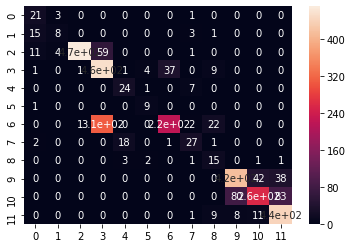

In [31]:
snb.heatmap(confusionMatrice, annot=True)

In [12]:
accuracyNB=sklearn.metrics.accuracy_score(y_test, y_predNaiveBayes, normalize=True, sample_weight=None)
accuracyNB
scores_comp=[]
noms_modeles=[]
noms_modeles.append('Naive Bayes')
scores_comp.append(cross_val_score(gnb, x_train, y_train, cv=5))
noms_modeles

D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

['Naive Bayes']

# RandomForest

In [13]:

clf100 = RandomForestClassifier(n_estimators=100)#à tester avec d'autres paramètres
y_predRandomForest100 = clf100.fit(x_train, y_train).predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test, y_predRandomForest100, normalize=True, sample_weight=None)
accuracy

D:\Logiciels\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9079696394686907

In [14]:
clf30 = RandomForestClassifier(n_estimators=30)#à tester avec d'autres paramètres
y_predRandomForest30 = clf30.fit(x_train, y_train).predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test, y_predRandomForest30, normalize=True, sample_weight=None)
accuracy

D:\Logiciels\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.907337128399747

In [15]:
clf10 = RandomForestClassifier(n_estimators=10)#à tester avec d'autres paramètres
y_predRandomForest10 = clf10.fit(x_train, y_train).predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test, y_predRandomForest10, normalize=True, sample_weight=None)
accuracy

D:\Logiciels\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8969006957621758

In [16]:
noms_modeles.append('RandomForest 100')
scores_comp.append(cross_val_score(clf100, x_train, y_train, cv=5))
scores = cross_val_score(clf100, x_train, y_train, cv=5)
scores.mean()

D:\Logiciels\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed whe

0.907333311685415

# ADA Boost

In [17]:
clfADA = AdaBoostClassifier(n_estimators=100)
noms_modeles.append('ADA Boost')
scores_comp.append(cross_val_score(clfADA, x_train, y_train, cv=5))
scores = cross_val_score(clfADA, x_train, y_train, cv=5)
scores.mean()

D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.5268484320569112

In [18]:
y_predADA = clfADA.fit(x_train, y_train).predict(x_test)
accuracy=sklearn.metrics.accuracy_score(y_test, y_predADA, normalize=True, sample_weight=None)
accuracy

D:\Logiciels\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5196078431372549

# GradientBoosting

In [22]:
clfGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
noms_modeles.append('Gradient Boosting')
score=cross_val_score(clfGB, x_train, y_train, cv=5)
scores_comp.append(score)
score

D:\Logiciels\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Logiciels\Anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

array([0.01861361, 0.00963391, 0.01608752, 0.00774693, 0.00968367])

# Comparaison

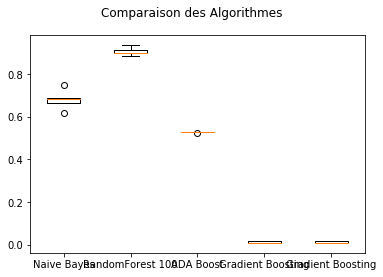

In [36]:
fig = plt.figure()
fig.suptitle('Comparaison des Algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores_comp)
ax.set_xticklabels(noms_modeles)
plt.show()

In [21]:
#valeurs dupliquées dans les sets et nan
#matrice de correlation
#analyse du dataset raw
#insertion du nom des activités